In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import time

In [2]:
start_time=time.time()

# 1.Read data from excel file

In [3]:
df=pd.read_excel('Data_Excel.xlsx')# file data about distance beetween 2 province
df.head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0.000000,1160.328125,1116.327582,124.340009,30.558650,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0.000000,126.385860,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.969150,25.156596,21.1382,105.5050
2,Hai Phong,1116.327582,126.385860,0.000000,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.142680,954.684700,385.354979,131.855404,20.8000,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0.000000,154.836491,706.318330,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.060030,1260.217144,10.0333,105.7833
4,Dong Nai,30.558650,1144.991818,1098.305041,154.836491,0.000000,572.923473,1144.164266,1115.131849,870.755856,...,1078.756363,1107.678552,282.901262,1327.577244,588.201480,169.248401,1274.383073,1168.998580,10.9277,106.8681


# 2.Visualization: provinces using Latitude and Longtitude from data

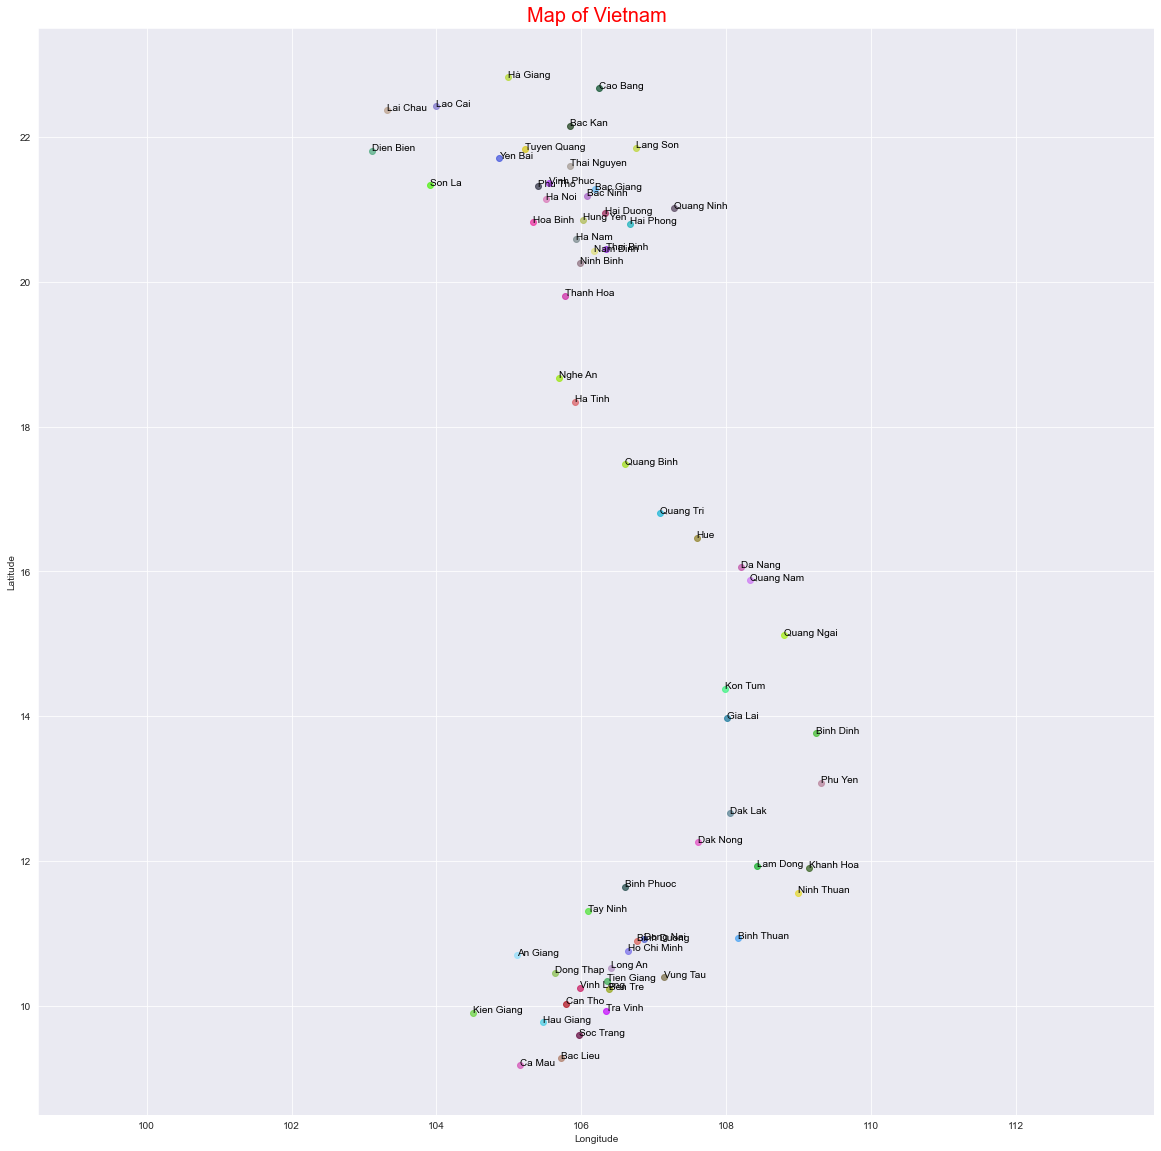

In [4]:
# Visualize
Longitude, Latitude, Province = df["Longitude"],df["Latitude"],df["Province"]

# change style plt
sns.set_style("darkgrid")

# size fig
plt.figure(figsize = (20,20))

# scatter
# plt.scatter(Longitude,Latitude, c = color, alpha = 0.4)

for x, y in zip(Longitude, Latitude):
    rgb = np.random.rand(3,)
    plt.scatter(x, y, c=[rgb], alpha = 0.7)

plt.axis([102,110,8,30])
plt.axis("equal")

# label
plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 1)
plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

for i in range(len(Province)):
    plt.text(Longitude[i],Latitude[i],Province[i],color = "black", fontsize = 10,alpha = 1)
# show
plt.show();

# 3. Convert matrix into list : distance provices

In [5]:
# we convert matrix distance into list distance
list_distance=[]
for i in df.values:
    list_distance.append(list(i[1:-2]))
# we convert province into index in list distance
dict_index_province={}
for i in range(len(Province)):
    dict_index_province[Province[i].strip()]=i
print(dict_index_province)
# example of how to get the distance between 2 provinces
list_distance[dict_index_province['Vinh Phuc']][dict_index_province['Can Tho']]# distance Vinh Phuc to Can Tho

{'Ho Chi Minh': 0, 'Ha Noi': 1, 'Hai Phong': 2, 'Can Tho': 3, 'Dong Nai': 4, 'Quang Nam': 5, 'Bac Ninh': 6, 'Hai Duong': 7, 'Nghe An': 8, 'Hue': 9, 'Thanh Hoa': 10, 'Khanh Hoa': 11, 'Nam Dinh': 12, 'Dak Lak': 13, 'Thai Nguyen': 14, 'Vung Tau': 15, 'Ca Mau': 16, 'Binh Dinh': 17, 'Soc Trang': 18, 'An Giang': 19, 'Phu Tho': 20, 'Thai Binh': 21, 'Quang Ngai': 22, 'Lam Dong': 23, 'Binh Duong': 24, 'Phu Yen': 25, 'Bac Lieu': 26, 'Dong Thap': 27, 'Binh Thuan': 28, 'Ninh Thuan': 29, 'Quang Ninh': 30, 'Ha Tinh': 31, 'Quang Binh': 32, 'Lang Son': 33, 'Gia Lai': 34, 'Long An': 35, 'Tra Vinh': 36, 'Ninh Binh': 37, 'Tay Ninh': 38, 'Tien Giang': 39, 'Hoa Binh': 40, 'Kon Tum': 41, 'Vinh Long': 42, 'Hau Giang': 43, 'Yen Bai': 44, 'Quang Tri': 45, 'Lao Cai': 46, 'Ben Tre': 47, 'Bac Giang': 48, 'Cao Bang': 49, 'Binh Phuoc': 50, 'Hà Giang': 51, 'Tuyen Quang': 52, 'Bac Kan': 53, 'Son La': 54, 'Ha Nam': 55, 'Hung Yen': 56, 'Kien Giang': 57, 'Lai Chau': 58, 'Da Nang': 59, 'Dak Nong': 60, 'Dien Bien': 61, 'V

1260.217143922348

# 4.Data about neighbour of the neighbor of the province

In [6]:
data_neighbour={'Lai Chau':['Dien Bien','Lao Cai','Son La','Yen Bai'],\
                'Yen Bai':['Lao Cai','Lai Chau','Son La','Hà Giang','Phu Tho','Tuyen Quang'],\
                'Dien Bien':['Lai Chau','Son La'],\
                'Thanh Hoa':['Son La','Nghe An','Ninh Binh','Hoa Binh'],
                'Nghe An':['Ha Tinh','Thanh Hoa'],\
                'Quang Binh':['Ha Tinh','Quang Tri'] ,\
                'Ha Tinh':['Nghe An','Quang Binh'],\
                'Quang Tri':['Quang Binh','Hue'],\
                'Hue':['Quang Tri','Da Nang','Quang Nam'],\
               'Da Nang':['Hue','Quang Nam'],\
                'Quang Nam':['Da Nang','Hue','Kon Tum','Quang Ngai'],\
                'Kon Tum':['Quang Nam','Quang Ngai','Gia Lai'],\
                'Quang Ngai':['Kon Tum','Quang Nam','Binh Dinh'],\
                'Gia Lai':['Kon Tum','Binh Dinh','Phu Yen','Dak Lak'],\
                'Binh Dinh':['Quang Ngai','Gia Lai','Phu Yen'],\
                'Dak Lak':['Dak Nong','Lam Dong','Khanh Hoa','Phu Yen','Gia Lai'],\
                'Phu Yen':['Gia Lai','Binh Dinh','Dak Lak','Khanh Hoa'],\
                'Khanh Hoa':['Dak Lak','Phu Yen','Lam Dong','Ninh Thuan'],\
                'Dak Nong':['Dak Lak','Lam Dong','Binh Phuoc'],\
                'Lam Dong':['Dak Lak','Dak Nong','Binh Phuoc','Dong Nai','Binh Thuan','Ninh Thuan','Khanh Hoa'],\
                'Ninh Thuan':['Lam Dong','Khanh Hoa','Binh Thuan'],\
                'Binh Phuoc':['Tay Ninh','Binh Duong','Dong Nai','Dak Nong','Lam Dong'],\
                'Dong Nai':['Lam Dong','Binh Phuoc','Binh Thuan','Ho Chi Minh','Vung Tau','Binh Duong'],\
                'Binh Thuan':['Vung Tau','Lam Dong','Ninh Thuan','Dong Nai'],\
                'Tay Ninh':['Long An', 'Ho Chi Minh', 'Binh Duong','Binh Phuoc'],\
                'Binh Duong':['Tay Ninh','Ho Chi Minh','Dong Nai','Binh Phuoc'],\
                'Ho Chi Minh':['Tay Ninh','Binh Duong','Dong Nai','Long An','Vung Tau'],\
                'Vung Tau':['Ho Chi Minh','Dong Nai','Binh Thuan'],\
                'Long An':['Tay Ninh','Ho Chi Minh','Dong Thap','Tien Giang'],\
                'Dong Thap':['Long An','Tien Giang','Vinh Long','Can Tho','An Giang'],\
                'Tien Giang':['Long An','Dong Thap','Vinh Long','Ben Tre'],\
                'Ben Tre':['Vinh Long','Tien Giang','Tra Vinh'],\
                'An Giang':['Kien Giang','Can Tho','Dong Thap'],\
                'Can Tho':['Kien Giang','An Giang','Dong Thap','Vinh Long','Hau Giang'],\
                'Vinh Long':['Can Tho','Dong Thap','Ben Tre','Tra Vinh','Hau Giang'],\
                'Tra Vinh':['Ben Tre','Vinh Long','Soc Trang'],\
                'Soc Trang':['Hau Giang','Bac Lieu','Tra Vinh'],\
                'Hau Giang':[ 'Kien Giang','Bac Lieu','Soc Trang','Can Tho','Vinh Long'],\
                'Kien Giang':['An Giang','Can Tho','Hau Giang','Bac Lieu','Ca Mau'],\
                'Bac Lieu':['Kien Giang','Hau Giang','Soc Trang','Ca Mau'],\
                'Ca Mau':['Kien Giang','Bac Lieu'],\
                'Ha Noi':['Phu Tho','Hoa Binh','Bac Giang','Vinh Phuc','Bac Ninh','Hung Yen','Ha Nam'],\
                'Phu Tho':['Son La','Yen Bai','Hoa Binh','Ha Noi','Vinh Phuc','Tuyen Quang'],\
                'Hoa Binh':['Ninh Binh','Thanh Hoa','Ha Nam','Ha Noi','Phu Tho','Son La'],\
                'Bac Giang':['Quang Ninh','Hai Duong','Bac Ninh','Ha Noi','Thai Nguyen','Lang Son'],\
                'Vinh Phuc':['Phu Tho', 'Ha Noi','Thai Nguyen','Tuyen Quang'],\
                'Bac Ninh':['Ha Noi','Hung Yen','Hai Duong', 'Bac Giang'],\
                'Hung Yen':['Ha Noi','Bac Ninh','Hai Duong','Thai Binh','Ha Nam'],\
                'Ha Nam':['Ha Noi','Hung Yen','Thai Binh','Nam Dinh','Ninh Binh','Hoa Binh'],\
                'Hai Phong':['Thai Binh','Thai Binh','Quang Ninh'],\
                'Hai Duong':['Bac Ninh', 'Hung Yen','Thai Binh','Hai Phong','Quang Ninh','Bac Giang'],\
                'Nam Dinh':['Ninh Binh','Ha Nam','Thai Binh'],\
                'Thai Nguyen':['Tuyen Quang', 'Bac Kan','Lang Son','Bac Giang','Ha Noi','Vinh Phuc'],\
                'Thai Binh':['Nam Dinh', 'Ha Nam','Hung Yen','Hai Duong','Hai Duong','Hai Phong'],\
                'Quang Ninh':['Hai Duong','Hai Phong','Bac Giang','Lang Son'],\
                'Lang Son':['Quang Ninh','Bac Giang','Thai Nguyen','Bac Kan','Cao Bang'],\
                'Ninh Binh':['Hoa Binh','Thanh Hoa','Nam Dinh','Ha Nam'],\
                'Lao Cai':['Lai Chau','Yen Bai','Hà Giang'],\
                'Cao Bang':['Hà Giang','Bac Kan','Lang Son'],\
                'Hà Giang':['Cao Bang','Tuyen Quang','Yen Bai','Lao Cai'],\
                'Tuyen Quang':['Hà Giang','Bac Kan','Thai Nguyen','Vinh Phuc','Phu Tho','Yen Bai'],\
                'Bac Kan':['Tuyen Quang','Thai Nguyen','Lang Son','Cao Bang'],\
                'Son La':['Dien Bien','Yen Bai','Phu Tho','Hoa Binh','Thanh Hoa'],\
               }
len(data_neighbour.keys())

63

# 5. Create 3 main warehouse

In [7]:
def create_main_warehouse():
    df=pd.read_excel('Data_Excel.xlsx')
    Latitude=list(df['Latitude'])
    Longitude=list(df['Longitude'])
    province=df['Province']
    position_main_warehouse1=[]
    position_main_warehouse2=[]
    position_main_warehouse3=[]
    for i in range(len(Latitude)):
        if Latitude[i] >20 :
            position_main_warehouse1.append(i)
        elif Latitude[i] >12:
            position_main_warehouse2.append(i)
        else:
            position_main_warehouse3.append(i)
    main_warehouse1=province[random.choice(position_main_warehouse1)].strip()
    main_warehouse2=province[random.choice(position_main_warehouse2)].strip()
    main_warehouse3=province[random.choice(position_main_warehouse3)].strip()
    list_main_warehouse=[main_warehouse1,main_warehouse2,main_warehouse3]
    return list_main_warehouse
print(create_main_warehouse())

['Hung Yen', 'Quang Tri', 'Ben Tre']


# 6. IDA_star

In [8]:
def IDA_star():
    global list_node_previous
    #define a threshold: theta =f(root_node) with f(n)=h(n)+g(n)
    threshold=list_distance[dict_index_province[start]][dict_index_province[goal]] 
    while True: # run infinity
        temp=search(start,0,threshold,parent='Null') #function search(node,g score,threshold)
        if temp=='FOUND': #if goal found
            return threshold
        threshold=temp  
def search(node,g,threshold,parent):  #recursive function
    f=g+list_distance[dict_index_province[node]][dict_index_province[goal]]
    if (f>threshold):#greater f encountered
        return f
    if (f<=threshold):
        list_node_previous[node]=parent
    if node==goal:   #Goal node found
        return 'FOUND'
    minn=10**10 #minn= Minimum integer
    for tempnode in nextnodes(node):
        #recursive call with next node as current node for depth search
        temp=search(tempnode,g+list_distance[dict_index_province[node]][dict_index_province[tempnode]],threshold,node)
        if temp=='FOUND':# if goal found
            return 'FOUND'
        if (temp<minn):# find the minimum of all f greater than threshold encountered  
            minn=temp
    return minn #//return the minimum f encountered greater than threshold
def nextnodes(node):
    return data_neighbour[node] #return list of all possible next nodes from node
def main_IDA_star():
    '''For easy handling, we divide it into 3 regions: 
the domain with longitude > 20,the domain with longitude from 12-20 and the region with longitude < 12
We discussed and found that such domain division reduces the running time and space complexity of the algorithm.
The two provinces that help us to effectively handle division are Thanh Hoa and Lam Dong.
'''
    global list_node_previous,start,goal
    list_node_previous={} # dictionary has key= expanded node, values= its parent node
    index_start=dict_index_province[start] # position of start in Province
    index_goal=dict_index_province[goal]   # position of goal in Province
    Lat_start=Latitude[index_start]        #Latitude of start
    Lat_goal=Latitude[index_goal]          # Longtitude of goal
    list_solution=[]   
    if (Lat_start>12) and (Lat_goal>12):
        if (Lat_start<18) and (Lat_goal>20):#solve with latitude of start from 12 to 18 and latitude of goal > 20
            t=goal
            goal='Thanh Hoa'
            cost_path=IDA_star()                   
            check=goal
            list_solution.append(check)
            while check!=start:
                check=list_node_previous[check]
                list_solution.append(check)
            list_solution=list_solution[::-1] # save solution when we solved
            list_node_previous={}
            start='Thanh Hoa'
            goal=t
            cost_path+=IDA_star()
            check=goal
            list_solution1=[]
            list_solution1.append(check)
            while check!=start:
                check=list_node_previous[check]
                list_solution1.append(check)
            list_solution=list_solution[:-1]+list_solution1[::-1]
            list_node_previous={}
        else:
            cost_path=IDA_star()
            check=goal
            list_solution.append(check)
            while check!=start:
                check=list_node_previous[check]
                list_solution.append(check)
            list_solution=list_solution[::-1]
            list_node_previous={}
    if (Lat_start<12) and (Lat_goal<12):
        cost_path=IDA_star()
        check=goal
        list_solution.append(check)
        while check!=start:
            check=list_node_previous[check]
            list_solution.append(check)
        list_solution=list_solution[::-1]
        list_node_previous={}
    if (Lat_start>12) and (Lat_goal<12):
        t=goal
        goal='Lam Dong'
        cost_path=IDA_star()
        check=goal
        list_solution.append(check)
        while check!=start:
            check=list_node_previous[check]
            list_solution.append(check)
        list_solution=list_solution[::-1]
        list_node_previous={}
        start='Lam Dong'
        goal=t
        cost_path+=IDA_star()
        check=goal
        list_solution1=[]
        list_solution1.append(check)
        while check!=start:
            check=list_node_previous[check]
            list_solution1.append(check)
        list_solution=list_solution[:-1]+list_solution1[::-1]
        list_node_previous={}
    if (Lat_start<12) and (Lat_goal>12):
        t=goal
        goal='Lam Dong'
        cost_path=IDA_star()
        check=goal
        list_solution.append(check)
        while check!=start:
            check=list_node_previous[check]
            list_solution.append(check)
        list_solution=list_solution[::-1]
        list_node_previous={}
        if Lat_goal>20:
            start='Lam Dong'
            goal='Thanh Hoa'
            cost_path+=IDA_star()
            check=goal
            list_solution1=[]
            list_solution1.append(check)
            while check!=start:
                check=list_node_previous[check]
                list_solution1.append(check)
            list_solution=list_solution[:-1]+list_solution1[::-1]
            list_node_previous={}
            start='Thanh Hoa'
            goal=t
            cost_path+=IDA_star()
            check=goal
            list_solution1=[]
            list_solution1.append(check)
            while check!=start:
                check=list_node_previous[check]
                list_solution1.append(check)
            list_solution=list_solution[:-1]+list_solution1[::-1]
            list_node_previous={}
        else:    
            start='Lam Dong'
            goal=t
            cost_path+=IDA_star()
            check=goal
            list_solution1=[]
            list_solution1.append(check)
            while check!=start:
                check=list_node_previous[check]
                list_solution1.append(check)
            list_solution=list_solution[:-1]+list_solution1[::-1]
            list_node_previous={}
    return cost_path,list_solution # return cost distance and list_solution is the provinces it traverses from start to goal
'''Such domain division will help us to solve problems. 
The process function below will pass the input parameter to the problem'''
def process(start_province,goal_province):
    global start,goal
    start=start_province
    goal=goal_province
    distance_path,solution_path_list=main_IDA_star()
    return distance_path,solution_path_list
print(process('Ha Noi','Ho Chi Minh'))

(1396.8677301548948, ['Ha Noi', 'Hoa Binh', 'Thanh Hoa', 'Nghe An', 'Ha Tinh', 'Quang Binh', 'Quang Tri', 'Hue', 'Quang Nam', 'Kon Tum', 'Gia Lai', 'Dak Lak', 'Lam Dong', 'Dong Nai', 'Ho Chi Minh'])


# 6. Solve problem

In [14]:
def main():
    list_main_warehouse=create_main_warehouse()
    print('Three of  main warehouse are ', list_main_warehouse)
    cost_truck = 35.000 
    cost_plane = 160.000 
    v_truck = 60 
    v_plane = 800 
    start_province=input('star province :')
    goal_province=input('end province : ')
    list_cost=[]
    #Case 1: from start to finish without taking any plane
    distance_path,solution_path_list=process(start_province,goal_province)
    list_cost.append([distance_path/v_truck*cost_truck,solution_path_list])
    #Case 2:From start to finish go through exactly 2 main warehouses
    ## + create 2 main warehouse:
    list_number=[]
    for i in range(3):
        for j in range(3):
            if i!=j:
                list_number.append([i,j])
    for i in list_number:
        cost=0
        #start -> main warehouse 1
        list_solution_2_main_warehouse=[]
        distance_path,solution_path_list=process(start_province,list_main_warehouse[i[0]])
        cost=cost+distance_path/v_truck*cost_truck
        list_solution_2_main_warehouse+=solution_path_list
        # main warehouse1 - main warehouse 2
        a=list_main_warehouse[i[0]]
        b=list_main_warehouse[i[1]]
        cost+=list_distance[dict_index_province[a]][dict_index_province[b]]/v_plane*cost_plane
        # main warehouse 2 -> goal
        distance_path,solution_path_list=process(list_main_warehouse[i[1]],goal_province)
        cost=cost+distance_path/v_truck*cost_truck
        list_solution_2_main_warehouse+=solution_path_list
        # append to list_cost
        list_cost.append([cost,list_solution_2_main_warehouse])
    list_cost_sort=sorted(list_cost)
    optimal_solution=list_cost_sort[0]
    print('cost optimal solution for problem is ' ,optimal_solution[0])
    print('path optimal solution for problem is  ',' -> '.join(optimal_solution[1]))
    return optimal_solution[1] # return for vizualization

path_optimal_solution=main()
end_time=time.time()
print('Running time is ',end_time-start_time)
print(path_optimal_solution)

Three of  main warehouse are  ['Lai Chau', 'Thanh Hoa', 'Ho Chi Minh']
star province :Ha Noi
end province : Ca Mau
cost optimal solution for problem is  452.2744515432988
path optimal solution for problem is   Ha Noi -> Hoa Binh -> Thanh Hoa -> Ho Chi Minh -> Long An -> Tien Giang -> Ben Tre -> Tra Vinh -> Soc Trang -> Bac Lieu -> Ca Mau
Running time is  206.79013752937317
['Ha Noi', 'Hoa Binh', 'Thanh Hoa', 'Ho Chi Minh', 'Long An', 'Tien Giang', 'Ben Tre', 'Tra Vinh', 'Soc Trang', 'Bac Lieu', 'Ca Mau']


# 7. Vizualization result

In [15]:
path_optimal_solution

['Ha Noi',
 'Hoa Binh',
 'Thanh Hoa',
 'Ho Chi Minh',
 'Long An',
 'Tien Giang',
 'Ben Tre',
 'Tra Vinh',
 'Soc Trang',
 'Bac Lieu',
 'Ca Mau']